
# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style(style='whitegrid')

filename = "../../assets/datasets/Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

# We need to process the dates to be datetime variables
data["sale_date"] = pd.to_datetime(data["sale_date"])

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 04:00:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 04:00:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 04:00:00,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 04:00:00,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 04:00:00,81900,38.519470,-121.435768


In [3]:
cleaned_data = data[data['sq__ft'] != 0]

In [4]:
def find_zip_code_area(zip):
    longitude_difference = cleaned_data[cleaned_data['zip'] == zip]['longitude'].max() - cleaned_data[cleaned_data['zip'] == zip]['longitude'].min()
    latitude_difference = cleaned_data[cleaned_data['zip'] == zip]['latitude'].max() - cleaned_data[cleaned_data['zip'] == zip]['latitude'].min()
    area = np.pi * (max(longitude_difference, latitude_difference)) ** 2
    return(area)

zip_code_areas = cleaned_data['zip'].apply(find_zip_code_area)
cleaned_data['zip_code_area'] = zip_code_areas

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with seaborn until you understand each one.

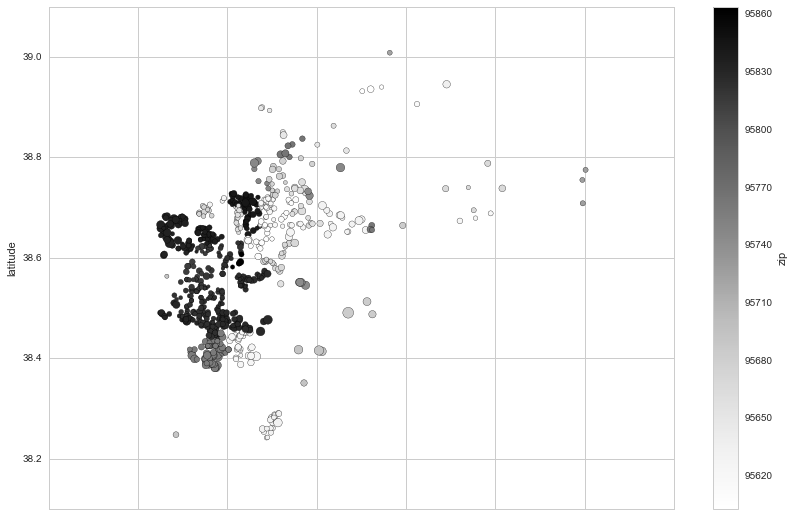

In [5]:
cleaned_data.plot.scatter(y = 'latitude', x = 'longitude', c = 'zip', figsize = (14, 9), s = list(cleaned_data['sq__ft'] / 50))
sns.plt.show()

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

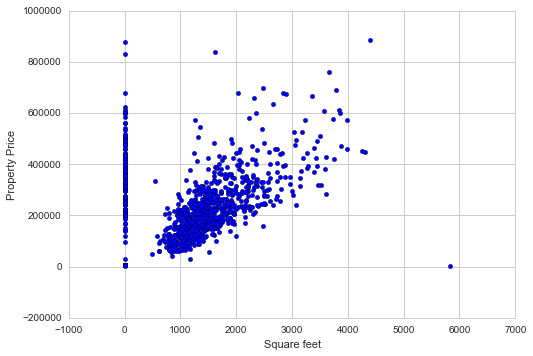

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

x = data['sq__ft']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Square feet")
plt.ylabel("Property Price")
plt.show()

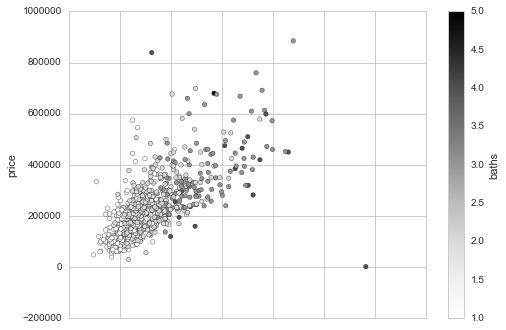

In [7]:
cleaned_data.plot.scatter(x = 'sq__ft', y = 'price', c = 'baths')

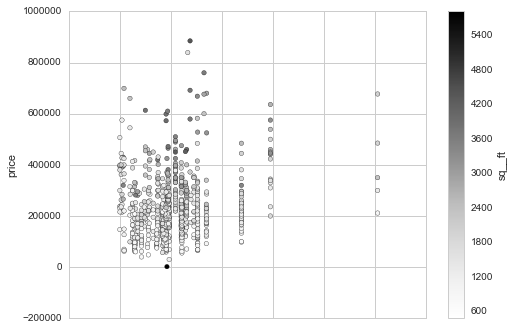

In [8]:
cleaned_data.plot.scatter(x = 'zip_code_area', y = 'price', c = 'sq__ft')

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

In [9]:
import statsmodels.api as sm

In [20]:
X = cleaned_data[['sq__ft', 'zip_code_area']]
X['sq__ft/baths'] = cleaned_data['sq__ft'] / cleaned_data['baths']
y = cleaned_data['price']

# X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.mse_model)
print(model.summary())

1.62039127258e+13
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     2221.
Date:                Mon, 12 Dec 2016   Prob (F-statistic):               0.00
Time:                        17:21:33   Log-Likelihood:                -10397.
No. Observations:                 814   AIC:                         2.080e+04
Df Residuals:                     811   BIC:                         2.081e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
sq__ft          117.8018    

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?